In [1]:
import IPython.display as ipd
import sounddevice as sd
import soundfile as sf
import librosa
from IPython.display import Audio
import numpy
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
samplerate = 48000  
duration = 15 # seconds
filename = 'ljhoil.wav'

print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)
#reading the voice commands
samples, sample_rate = librosa.load(filename , sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

start
end


/var/folders/x9/n1r_gs1165q4q9xybcbl49_c0000gn/T/ipykernel_27426/3304435424.py:13: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 8000)


In [4]:
# Changer l'audio

audio_aissa, sr_aissa = librosa.load('audios/aissa.wav')

Audio(audio_aissa, rate=sr_aissa)

In [5]:
# Charger l'audio 

audio_marouan, sr_marouan = librosa.load('audios/marouan.wav')

Audio(audio_marouan, rate=sr_marouan)

In [6]:
# generate dataset from the audio signal, the samplerate and the label
def generate_dataset(audio, sr, label):
    # generate Mel spectrogram
    spec = librosa.feature.melspectrogram(audio, sr)
    # generate DataFrame from spectrogram (columns: frequencies, rows: analysis frames)
    X = pd.DataFrame(spec.transpose())
    # generate Series for the labels (same label for all examples)
    
    y = pd.Series(label).repeat(X.shape[0])
    return X, y

In [7]:
# generate dataset for "marouan"
X_aissa, y_aissa = generate_dataset(audio_aissa, sr_aissa, "aissa")
X_marouan, y_marouan = generate_dataset(audio_marouan, sr_marouan, "marouan")


/var/folders/x9/n1r_gs1165q4q9xybcbl49_c0000gn/T/ipykernel_27426/2788675571.py:4: FutureWarning: Pass y=[-0.0053512  -0.01252536 -0.0115488  ...  0.02298192  0.02161846
  0.0202678 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(audio, sr)
/var/folders/x9/n1r_gs1165q4q9xybcbl49_c0000gn/T/ipykernel_27426/2788675571.py:4: FutureWarning: Pass y=[-0.0144197  -0.03235101 -0.03228399 ...  0.00193254  0.00216971
  0.00231963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(audio, sr)


In [8]:
X = pd.concat([X_aissa, X_marouan])
y = pd.concat([y_aissa, y_marouan])

/Users/x/.local/share/virtualenvs/speaker_recognition-4eUny3JK/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


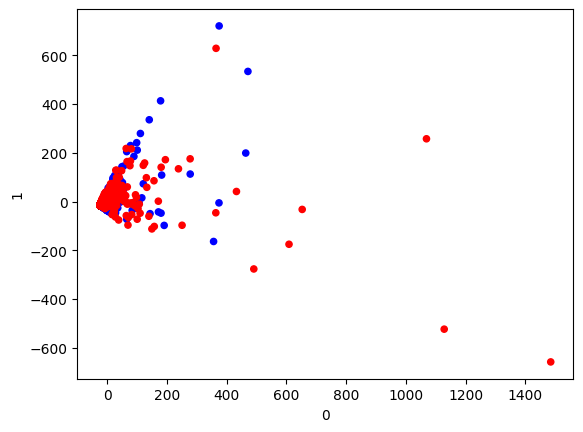

In [9]:
# observe the features using PCA decomposition over 2 dimensions
# classes clusters should be visually separable
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit(X).transform(X))
_ = X_pca.plot.scatter(x=0, y=1, c=y.apply(lambda x: "blue" if x == "aissa" else "red"), colormap="plasma")

In [10]:
# generate train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ('lr', LogisticRegression())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [12]:
accuracy_score(y_pred, y_test)

0.8220140515222483

In [13]:
f1_score(y_test, y_pred, pos_label=pipe.classes_[1])

0.808080808080808

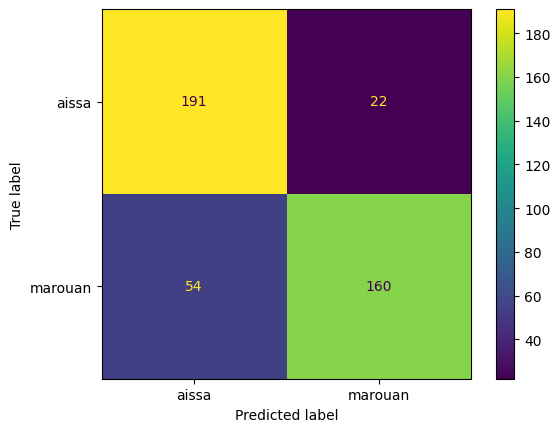

In [14]:
# display the confusion matrix
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [15]:
samplerate = 48000  
duration = 15 # seconds
filename = 'bruits3.wav'

print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)
#reading the voice commands
samples, sample_rate = librosa.load(filename , sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

start
end


/var/folders/x9/n1r_gs1165q4q9xybcbl49_c0000gn/T/ipykernel_27426/1604436010.py:13: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 8000)


In [16]:
# Changer l'audio

audio_eval, sr_eval = librosa.load('audios/eval.wav')

Audio(audio_eval, rate=sr_eval)

In [17]:
# generate the input data (ignore label series)
X_eval, _ = generate_dataset(audio_eval, sr_eval, '')

# predict the label for each spectrogram frame

y_pred_eval = pipe.predict(X_eval)

# compute count of unique values for each label
eval_unique_labels, eval_unique_counts = np.unique(y_pred_eval, return_counts=True)
eval_unique_labels, eval_unique_counts

/var/folders/x9/n1r_gs1165q4q9xybcbl49_c0000gn/T/ipykernel_27426/2788675571.py:4: FutureWarning: Pass y=[ 0.00137815  0.00041509 -0.00051389 ... -0.17431775 -0.1633125
 -0.1631932 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = librosa.feature.melspectrogram(audio, sr)


(array(['aissa', 'marouan'], dtype=object), array([ 43, 173]))

In [18]:
prediction = eval_unique_labels[np.argmax(eval_unique_counts)]